**3. Machine Learning Implementation**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBRegressor, XGBClassifier

In [2]:
df=df = pd.read_csv("metro_traffic_data.csv")
df.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'traffic_volume',
       'hour', 'day_of_week', 'month', 'is_holiday_encoded',
       'weather_type_Clouds', 'weather_type_Drizzle', 'weather_type_Fog',
       'weather_type_Haze', 'weather_type_Mist', 'weather_type_Rain',
       'weather_type_Smoke', 'weather_type_Snow', 'weather_type_Squall',
       'weather_type_Thunderstorm', 'weather_description_Sky is Clear',
       'weather_description_broken clouds', 'weather_description_drizzle',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_freezing rain', 'weather_description_haze',
       'weather_description_heavy intensity drizzle',
       'weather_description_heavy intensity rain',
       'weather_description_heavy snow',
       'weather_description_light intensity drizzle',
       'weath

In [3]:
#pre-processing for the ml for [Regression Models]
# -------------------- Utility: Feature Selection --------------------

def get_features_and_target(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

# Drop unwanted columns for ML
drop_cols = ['date_time', 'traffic_volume', 'traffic_level','weather_type']
df_ml = df.drop(columns=drop_cols)

# Add target separately when needed
X_reg, y_reg = df_ml.copy(), df['traffic_volume']
X_cls, y_cls = df_ml.copy(), df['traffic_level']

# Train-test split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [4]:
# -------------------- 1. Regression Models --------------------

def train_regressors(X_train, y_train):
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42)
    }
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
    return trained_models

def evaluate_regressors(models, X_test, y_test):
    for name, model in models.items():
        preds = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)
        print(f"\n{name} Regression Metrics:")
        print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.3f}")

In [5]:
#pre-processing for the ml for [Classification Models]
# Encode classification target labels
le_cls = LabelEncoder()
y_cls_encoded = le_cls.fit_transform(y_cls)  # Converts 'Low', 'Medium', 'High' to 0, 1, 2

# Train-test split again with encoded labels
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls_encoded, test_size=0.2, random_state=42)


In [6]:
# -------------------- 2. Classification Models --------------------

def train_classifiers(X_train, y_train):
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(eval_metric='mlogloss'),  # Removed use_label_encoder
        "SVM": SVC(kernel='rbf', probability=True)
    }
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
    return trained_models

def evaluate_classifiers(models, X_test, y_test):
    for name, model in models.items():
        preds = model.predict(X_test)
        print(f"\n{name} Classification Report:")
        print(classification_report(y_test, preds, target_names=le_cls.classes_))

In [7]:
#-----------------------accuracy_score--------------------------
from sklearn.metrics import accuracy_score, classification_report

def evaluate_classifiers(models, X_test, y_test):
    for name, model in models.items():
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print(f"\n{name} Classification Report:")
        print(f"Accuracy: {acc:.4f}")
        print(classification_report(y_test, preds))


In [9]:
# -------------------- 3. Training and Evaluation --------------------

# 1. Regression: Train and Evaluate
reg_models = train_regressors(X_reg_train, y_reg_train)
reg_results=evaluate_regressors(reg_models, X_reg_test, y_reg_test)


Linear Regression Regression Metrics:
RMSE: 1802.40, MAE: 1579.43, R²: 0.187

Random Forest Regression Metrics:
RMSE: 462.13, MAE: 261.80, R²: 0.947

XGBoost Regression Metrics:
RMSE: 434.87, MAE: 260.51, R²: 0.953


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

reg_results = {}

for name, model in reg_models.items():
    preds = model.predict(X_reg_test)
    rmse = np.sqrt(mean_squared_error(y_reg_test, preds))
    mae = mean_absolute_error(y_reg_test, preds)
    r2 = r2_score(y_reg_test, preds)

    print(f"\n{name} Regression Metrics:")
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.3f}")

    reg_results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}


Linear Regression Regression Metrics:
RMSE: 1802.40, MAE: 1579.43, R²: 0.187

Random Forest Regression Metrics:
RMSE: 462.13, MAE: 261.80, R²: 0.947

XGBoost Regression Metrics:
RMSE: 434.87, MAE: 260.51, R²: 0.953


In [17]:
# Find best model based on lowest RMSE
best_model_rmse = min(reg_results, key=lambda k: reg_results[k]["RMSE"])
print(f"\n🔍 Best Model (Lowest RMSE): {best_model_rmse} with RMSE = {reg_results[best_model_rmse]['RMSE']:.2f}")

# Optionally: Find best based on highest R²
best_model_r2 = max(reg_results, key=lambda k: reg_results[k]["R2"])
print(f"🎯 Best Model (Highest R²): {best_model_r2} with R² = {reg_results[best_model_r2]['R2']:.3f}")


🔍 Best Model (Lowest RMSE): XGBoost with RMSE = 434.87
🎯 Best Model (Highest R²): XGBoost with R² = 0.953


In [18]:
# -------------------- 3. Training and Evaluation --------------------
#  2.classification: Train and evaluate
cls_models = train_classifiers(X_cls_train, y_cls_train)
evaluate_classifiers(cls_models, X_cls_test, y_cls_test)


Random Forest Classification Report:
Accuracy: 0.8861
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      2284
           1       0.97      0.92      0.94      2247
           2       0.84      0.82      0.83      2219

    accuracy                           0.89      6750
   macro avg       0.89      0.89      0.89      6750
weighted avg       0.89      0.89      0.89      6750


XGBoost Classification Report:
Accuracy: 0.9124
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2284
           1       0.96      0.95      0.96      2247
           2       0.88      0.86      0.87      2219

    accuracy                           0.91      6750
   macro avg       0.91      0.91      0.91      6750
weighted avg       0.91      0.91      0.91      6750


SVM Classification Report:
Accuracy: 0.6388
              precision    recall  f1-score   support

           0       0.72      0.52 

In [19]:
acc_results = {}

for name, model in cls_models.items():
    preds = model.predict(X_cls_test)
    acc = accuracy_score(y_cls_test, preds)
    acc_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

best_cls_model = max(acc_results, key=acc_results.get)
print(f"\n🏆 Best Classification Model: {best_cls_model} with Accuracy = {acc_results[best_cls_model]:.4f}")

Random Forest Accuracy: 0.8861
XGBoost Accuracy: 0.9124
SVM Accuracy: 0.6388

🏆 Best Classification Model: XGBoost with Accuracy = 0.9124


In [38]:
df.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'traffic_volume',
       'hour', 'day_of_week', 'month', 'is_holiday_encoded',
       'weather_type_Clouds', 'weather_type_Drizzle', 'weather_type_Fog',
       'weather_type_Haze', 'weather_type_Mist', 'weather_type_Rain',
       'weather_type_Smoke', 'weather_type_Snow', 'weather_type_Squall',
       'weather_type_Thunderstorm', 'weather_description_Sky is Clear',
       'weather_description_broken clouds', 'weather_description_drizzle',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_freezing rain', 'weather_description_haze',
       'weather_description_heavy intensity drizzle',
       'weather_description_heavy intensity rain',
       'weather_description_heavy snow',
       'weather_description_light intensity drizzle',
       'weath

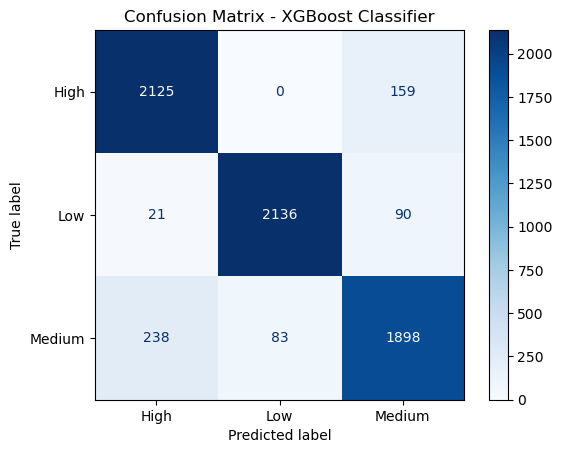

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use your already-trained classification model (e.g., XGBoost)
model_cls = cls_models["XGBoost"]  # or "Random Forest"
y_cls_pred = model_cls.predict(X_cls_test)

# Confusion Matrix
cm_cls = confusion_matrix(y_cls_test, y_cls_pred)
disp_cls = ConfusionMatrixDisplay(confusion_matrix=cm_cls, display_labels=le_cls.classes_)
disp_cls.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()


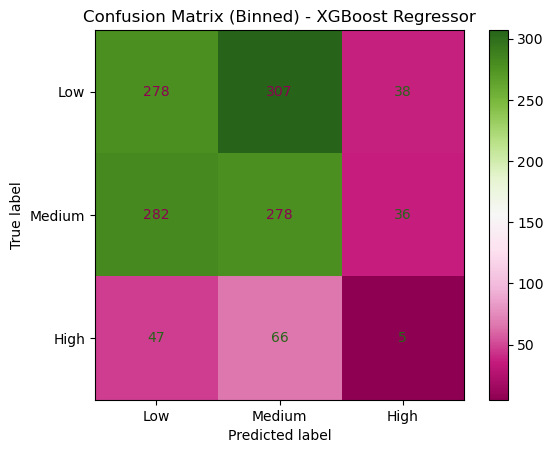

Dropped 5413 samples due to NaN after binning.


IndexError: boolean index did not match indexed array along dimension 0; dimension is 6750 but corresponding boolean dimension is 12158

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- 1. Predict regression values ---
y_reg_pred = reg_models['XGBoost'].predict(X_reg_test)

# --- 2. Define bins and labels ---
bins = [0, 3000, 6000, np.inf]
labels = ['Low', 'Medium', 'High']

# --- 3. Bin actual and predicted values (force Series with category dtype) ---
y_reg_binned = pd.Series(pd.cut(y_reg_test, bins=bins, labels=labels))
y_pred_binned = pd.Series(pd.cut(y_reg_pred, bins=bins, labels=labels))

# --- 4. Drop NaNs ---
mask = (~y_reg_binned.isna()) & (~y_pred_binned.isna())
y_reg_binned = y_reg_binned[mask]
y_pred_binned = y_pred_binned[mask]

# --- 5. Encode categories to integers ---
y_reg_true_enc = pd.Categorical(y_reg_binned, categories=labels).codes
y_reg_pred_enc = pd.Categorical(y_pred_binned, categories=labels).codes

# --- 6. Confusion Matrix ---
cm_reg = confusion_matrix(y_reg_true_enc, y_reg_pred_enc)
disp_reg = ConfusionMatrixDisplay(confusion_matrix=cm_reg, display_labels=labels)
disp_reg.plot(cmap='PiYG')
plt.title("Confusion Matrix (Binned) - XGBoost Regressor")
plt.show()

# --- 7. Optional: Show how many rows were dropped ---
print(f"Dropped {len(y_reg_test) - len(y_reg_binned)} samples due to NaN after binning.")

# --- 8. Optional: DataFrame with actual & predicted ---
results_df = pd.DataFrame({
    "Actual Volume": np.array(y_reg_test)[mask],
    "Predicted Volume": y_reg_pred[mask],
    "Actual Category": y_reg_binned.values,
    "Predicted Category": y_pred_binned.values
})
print(results_df.head())


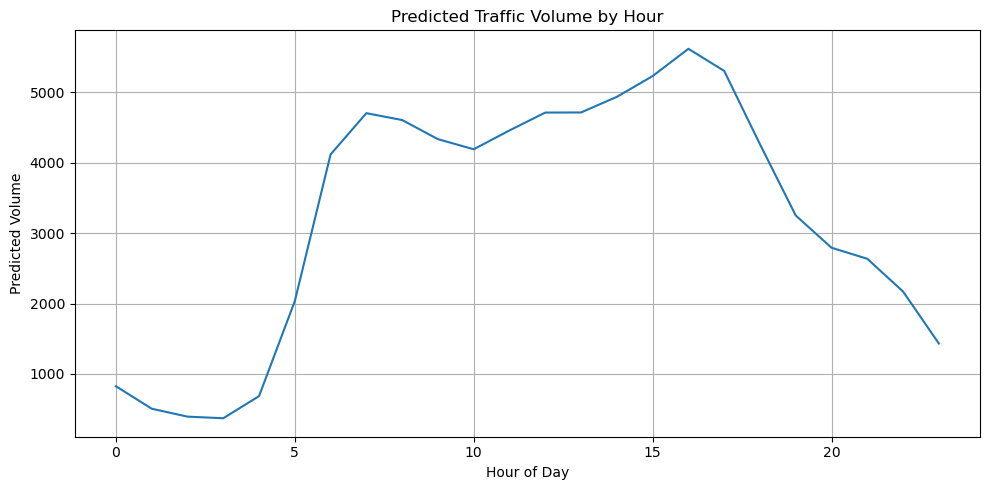

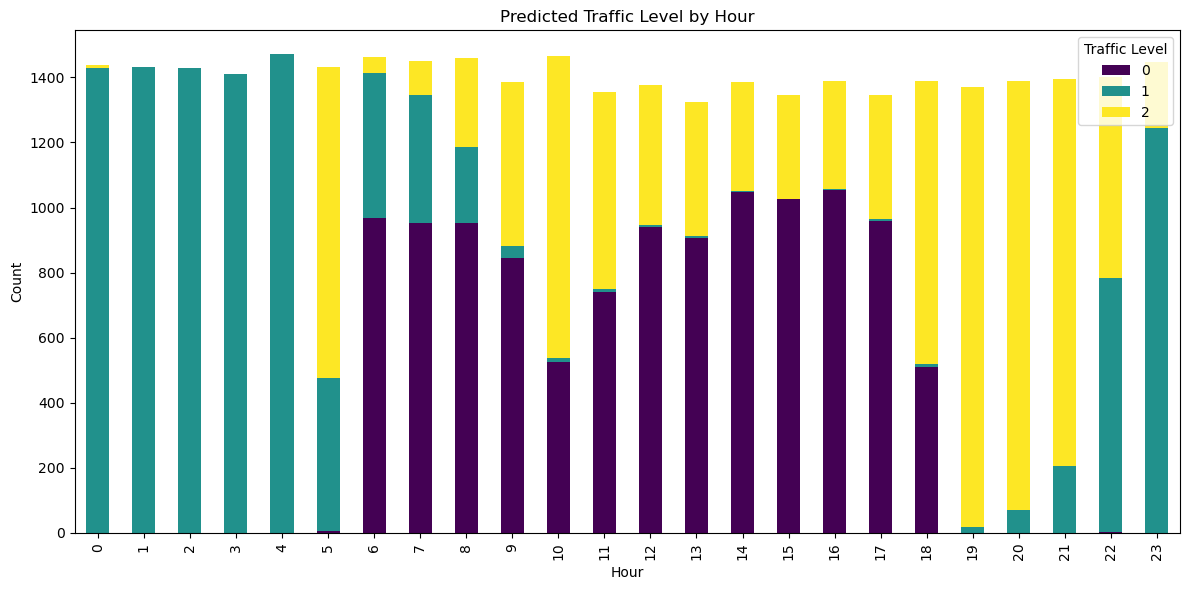

In [87]:
# -------------------- 4. Deployment Simulation (Visualization) --------------------

def deployment_simulation(df, reg_model, cls_model):
    df['predicted_volume'] = reg_model.predict(df_ml)
    df['predicted_level'] = cls_model.predict(df_ml)

    # Line chart: Hour vs Predicted Traffic Volume
    hourly = df.groupby('hour')['predicted_volume'].mean()
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=hourly.index, y=hourly.values)
    plt.title("Predicted Traffic Volume by Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Predicted Volume")
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Bar chart: Hour vs Traffic Level Count
    hourly_level = df.groupby(['hour', 'predicted_level']).size().unstack().fillna(0)
    hourly_level.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
    plt.title("Predicted Traffic Level by Hour")
    plt.xlabel("Hour")
    plt.ylabel("Count")
    plt.legend(title='Traffic Level')
    plt.tight_layout()
    plt.show()

# Simulate with best models (e.g., XGBoost Regressor and Random Forest Classifier)
deployment_simulation(df.copy(), reg_models['XGBoost'], cls_models['Random Forest'])

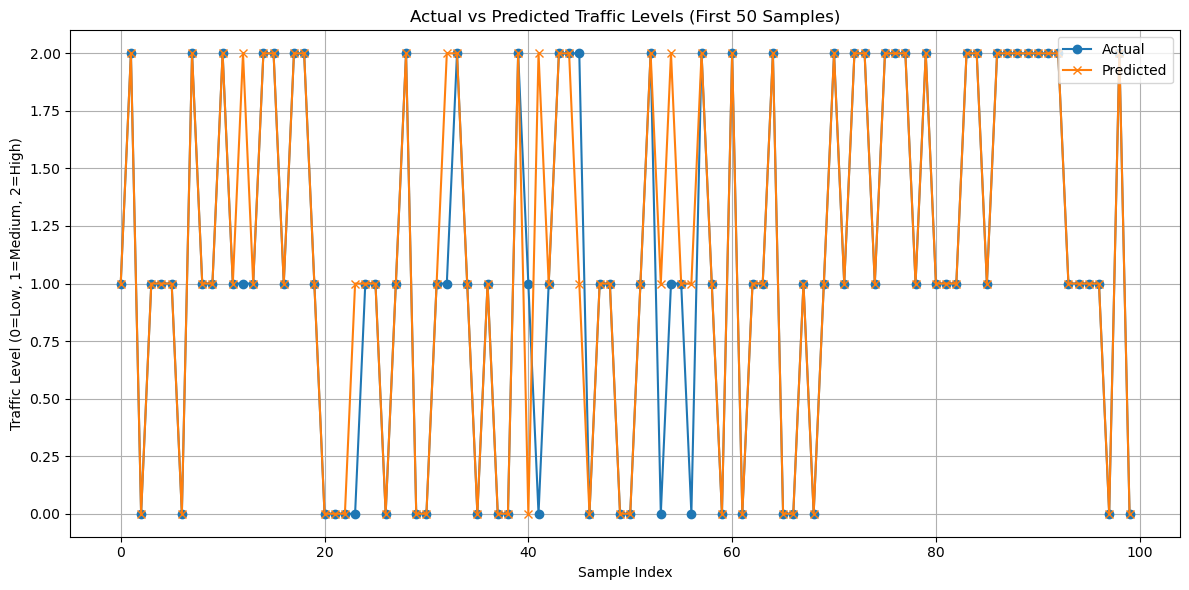

In [89]:
import matplotlib.pyplot as plt

# 1. Get predicted values from best classification model
best_model = cls_models[best_cls_model]
predicted_classify_result = best_model.predict(X_cls_test)

# 2. Take a subset of the test results for easier visualization
num_samples = 100
true_labels = y_cls_test[:num_samples]
predicted_labels = predicted_classify_result[:num_samples]

# 3. Decode labels (optional: to show actual class names like 'Low', 'Medium', 'High')
true_labels_str = le_cls.inverse_transform(true_labels)
predicted_labels_str = le_cls.inverse_transform(predicted_labels)

# 4. Map class names to integers for plotting
label_map = {'Low': 0, 'Medium': 1, 'High': 2}
true_encoded = [label_map[label] for label in true_labels_str]
pred_encoded = [label_map[label] for label in predicted_labels_str]

# 5. Plot
plt.figure(figsize=(12, 6))
plt.plot(true_encoded, label='Actual', marker='o')
plt.plot(pred_encoded, label='Predicted', marker='x')
plt.title('Actual vs Predicted Traffic Levels (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Level (0=Low, 1=Medium, 2=High)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


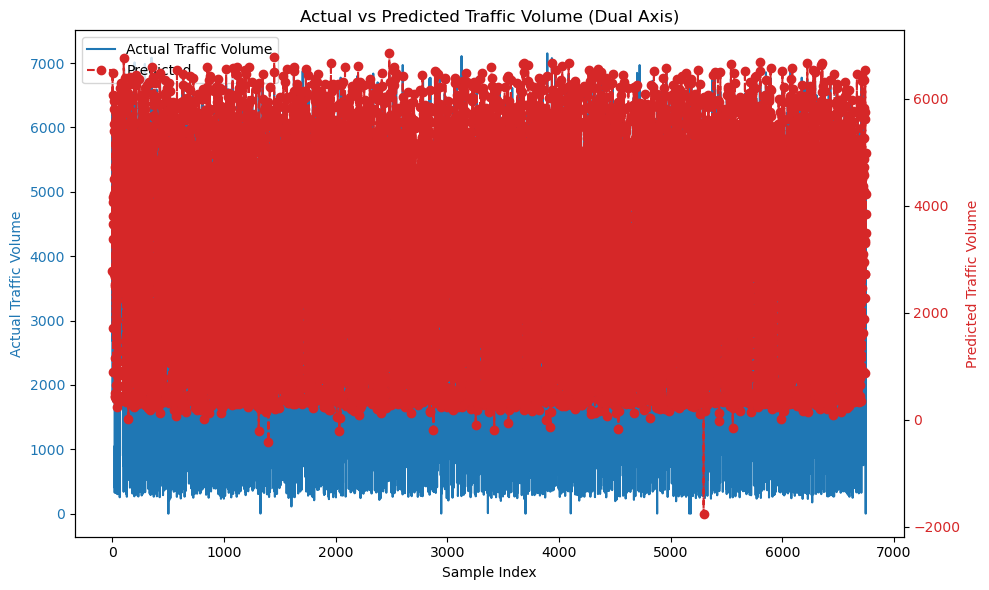

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Make sure we have predictions
y_reg_pred = reg_models['XGBoost'].predict(X_reg_test)

# 2. Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual': y_reg_test.values,
    'Predicted': y_reg_pred
}).reset_index(drop=True)

# Optional: sort by index for smoother line plotting
plot_df = plot_df.sort_index()

# 3. Plot with dual Y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left Y-axis: Actual traffic volume
ax1.plot(plot_df.index, plot_df['Actual'], color='tab:blue', label='Actual Traffic Volume')
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Actual Traffic Volume', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Right Y-axis: Predicted traffic volume
ax2 = ax1.twinx()
ax2.plot(plot_df.index, plot_df['Predicted'], color='tab:red', linestyle='--', marker='o', label='Predicted')
ax2.set_ylabel('Predicted Traffic Volume', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title & Legends
ax1.set_title('Actual vs Predicted Traffic Volume (Dual Axis)')
fig.tight_layout()

# Add legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


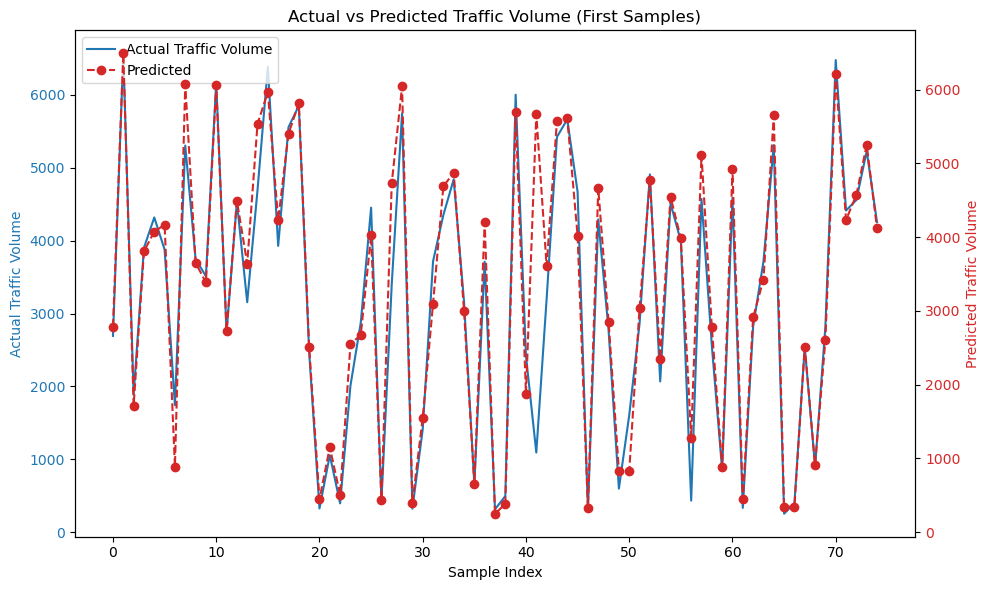

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Make predictions
y_reg_pred = reg_models['XGBoost'].predict(X_reg_test)

# 2. Create DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual': y_reg_test.values,
    'Predicted': y_reg_pred
}).reset_index(drop=True)

# Keep only first x values
x=75
plot_df = plot_df.head(x)

# 3. Plot with dual Y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left Y-axis: Actual traffic volume
ax1.plot(plot_df.index, plot_df['Actual'], color='tab:blue', label='Actual Traffic Volume')
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Actual Traffic Volume', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Right Y-axis: Predicted traffic volume
ax2 = ax1.twinx()
ax2.plot(plot_df.index, plot_df['Predicted'], color='tab:red', linestyle='--', marker='o', label='Predicted')
ax2.set_ylabel('Predicted Traffic Volume', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title & Legends
ax1.set_title('Actual vs Predicted Traffic Volume (First Samples)')
fig.tight_layout()

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()
